**Nama:** Sheila Amalia Burhanudin
<br>**Username:** sheilaamaliab
<br>**Email:** sheilaamalia85@gmail.com
<br>**Domisili:** Jakarta Pusat

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# import datasets rockpaperscissor.zip dengan wget
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-05-10 14:12:05--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  5.23MB/s    in 61s     

2021-05-10 14:13:07 (5.02 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [3]:
# extract foto pada zip file
import zipfile, os
local_zip = '/tmp/rockpaperscissors.zip'
base_directory = '/tmp/rockpaperscissors/rps-cv-images'
zip_ext = zipfile.ZipFile(local_zip, 'r')
zip_ext.extractall('/tmp')
zip_ext.close()

In [4]:
# cek direktori
os.listdir('/tmp/rockpaperscissors/rps-cv-images')

['paper', 'README_rpc-cv-images.txt', 'scissors', 'rock']

In [12]:
# melakukan image augmentation (Keras ImageDataGenerator)
datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 30,
    shear_range = 0.3,
    horizontal_flip = True,
    fill_mode = 'wrap',
    validation_split = 0.4  # ukuran validation set 40% dari total dataset 
)

datagen

In [13]:
# mempersiapkan data train dan data validation
train_generator = datagen.flow_from_directory(
    base_directory, # direktori data target
    target_size = (100, 100),
    class_mode = 'categorical', # membagi 3 kelas kategori (rock, paper, scissors)
    subset = 'training' # subset digunakan karena penggunaan validation_split pada data generator
)

validation_generator = datagen.flow_from_directory(
    base_directory,
    target_size = (100, 100),
    class_mode = 'categorical',
    subset = 'validation' # subset digunakan karena penggunaan validation_split pada data generator
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [14]:
# membuat model CNN
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (100, 100, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(256, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'), # hidden layer 
    tf.keras.layers.Dense(64, activation = 'relu'), # hidden layer
    tf.keras.layers.Dense(3, activation = 'softmax') # output layer, aktivasi softmax dipilih karena output terdiri dari 3 kategori
])

In [15]:
# compile model
model.compile(
    loss = 'categorical_crossentropy', # categorical_crossentropy dipilih karena output berupa kategori
    optimizer = 'adam',
    metrics = ['accuracy']               
)

In [17]:
# penggunaan callback ModelCheckPoint
from keras.callbacks import ModelCheckpoint
callback = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', save_best_only=True)

In [18]:
# proses latih model dengan model.fit
history = model.fit(
    train_generator,
    steps_per_epoch = 25,
    epochs = 25,
    validation_data = validation_generator,
    validation_steps = 5,
    verbose = 2,
    callbacks = [callback]
)

Epoch 1/25
25/25 - 21s - loss: 1.0898 - accuracy: 0.3613 - val_loss: 1.0536 - val_accuracy: 0.4812
Epoch 2/25
25/25 - 19s - loss: 0.9809 - accuracy: 0.5442 - val_loss: 0.7518 - val_accuracy: 0.7563
Epoch 3/25
25/25 - 20s - loss: 0.6401 - accuracy: 0.7312 - val_loss: 0.3204 - val_accuracy: 0.8750
Epoch 4/25
25/25 - 19s - loss: 0.3488 - accuracy: 0.8805 - val_loss: 0.2463 - val_accuracy: 0.9062
Epoch 5/25
25/25 - 20s - loss: 0.2861 - accuracy: 0.8950 - val_loss: 0.2782 - val_accuracy: 0.9125
Epoch 6/25
25/25 - 19s - loss: 0.3680 - accuracy: 0.8494 - val_loss: 0.2891 - val_accuracy: 0.8938
Epoch 7/25
25/25 - 19s - loss: 0.2422 - accuracy: 0.9026 - val_loss: 0.2071 - val_accuracy: 0.9312
Epoch 8/25
25/25 - 20s - loss: 0.1950 - accuracy: 0.9262 - val_loss: 0.2476 - val_accuracy: 0.9312
Epoch 9/25
25/25 - 19s - loss: 0.1311 - accuracy: 0.9558 - val_loss: 0.1791 - val_accuracy: 0.9375
Epoch 10/25
25/25 - 20s - loss: 0.1126 - accuracy: 0.9638 - val_loss: 0.1279 - val_accuracy: 0.9625
Epoch 11/

In [19]:
# load a saved model
from keras.models import load_model
saved_model = load_model('best_model.h5')
saved_model

Saving 2EeIeEe1P0a0Fi9v.png to 2EeIeEe1P0a0Fi9v.png
2EeIeEe1P0a0Fi9v.png
scissors


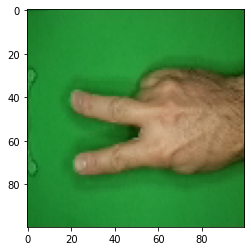

In [23]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(100,100))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = saved_model.predict(images, batch_size=15)
  
  print(fn)
  if classes[0, 0] == 1:
    print('paper')
  elif classes[0, 1] == 1:
    print('rock')
  elif classes[0, 2] == 1:
    print('scissors')

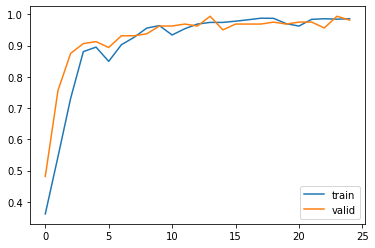

In [22]:
# plot training history
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='valid')
plt.legend()
plt.show()

**Kesimpulan**: Model Machine Learning berhasil memprediksi gambar dengan akurasi final mencapai 98%